In [67]:
import pandas as pd
import numpy as np
import pickle
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
transformer = TfidfVectorizer(max_df=0.6, max_features=1500)

In [74]:
# read data.csv
mails = pd.read_csv('/insert_your_path_here/data.csv', sep='\t')
mails = mails.dropna()
mails.head()




,label,text
0,business,market christian pleas announc develop short f...
1,business,start date hourahead hour ancillari schedul aw...
2,business,may pm may ec ecn network interconnect june th...
3,business,understand follow messag forward marti rick sh...
4,business,check think need sign forward tim belden hou e...


In [61]:
mails['label'].value_counts()

business    4870
personal    1824
Name: label, dtype: int64

In [62]:
mails = mails.assign(label = np.where(mails['label'] == 'business', 1, 0))
mails.head()

,label,text
0,1,market christian pleas announc develop short f...
1,1,start date hourahead hour ancillari schedul aw...
2,1,may pm may ec ecn network interconnect june th...
3,1,understand follow messag forward marti rick sh...
4,1,check think need sign forward tim belden hou e...


In [63]:
# naive bayes_classificator
y = mails.label

In [64]:
X_text = mails['text']

In [71]:
transformer.fit(X_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.6, max_features=1500, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [72]:
filename = 'transformer_model.sav'
pickle.dump(transformer, open(filename, 'wb'))

In [21]:
X = transformer.transform(X_text)

In [22]:
X.shape

(6694, 1500)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification).   __[link](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)__ Naive Bayes treats each word independently and we can estimare the probability of each word to be the trigger for for each class(business or personal). We use the assumption that there is a set of specific words that define each class. In that case naive bayes should show us relatively high accuracy of classification.


In [24]:
clf = MultinomialNB()

In [25]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
predicted_values = clf.predict_proba(X_test)

Probabilty of each class

In [27]:
predicted_values[:,0]

array([0.96366804, 0.0156586 , 0.97706719, ..., 0.00509579, 0.0254039 ,
       0.01232701])

In [28]:
multinb_roc_auc = roc_auc_score(y_test, predicted_values[:, 1])
multinb_roc_auc

0.9830221674702463

In [29]:
scores = cross_val_score(clf, X, y, cv=5)

In [30]:
scores

array([0.95220314, 0.94772218, 0.93876027, 0.94324122, 0.9431988 ])

In [31]:
neg_class_prob_sorted = clf.feature_log_prob_[0, :].argsort()
pos_class_prob_sorted = clf.feature_log_prob_[1, :].argsort()

Lets visualize top 30 words for each category in form of word clouds.

In [52]:
top_30_business = ' '.join(np.take(transformer.get_feature_names(), neg_class_prob_sorted[:30]))
top_30_personal = ' '.join(np.take(transformer.get_feature_names(), pos_class_prob_sorted[:30]))

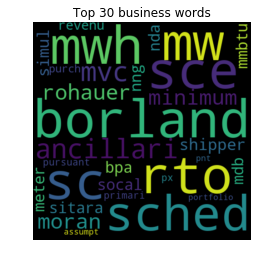

In [53]:
text= top_30_business
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480).generate(text)
 
# Display the generated image:
plt.title("Top 30 business words")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

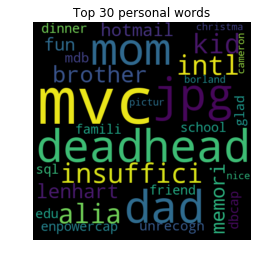

In [54]:
text= top_30_personal
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480).generate(text)
 
# Display the generated image:
plt.title("Top 30 personal words")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

The main weakness of Naive Bayes classifier is that can not detexct complex interactions of words within a text so it seems reasonable to use neural network archeticture. We use Keras to build and train our network __[link](https://keras.io/)__

In [ ]:
# We will give more training data to NN

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X, y, test_size=0.1)



In [38]:
# Build Keras Model and Fit
num_labels = 2
vocab_size = 1500
batch_size = 400

model = Sequential()
model.add(Dense(32, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                48032     
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 130       
__________

In [39]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])
 
history = model.fit(X_train_nn, y_train_nn,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=1,
                    validation_split=0.1)

Train on 5421 samples, validate on 603 samples
Epoch 1/20


 400/5421 [=>............................] - ETA: 10s - loss: 0.6926 - acc: 0.5600

1600/5421 [=======>......................] - ETA: 2s - loss: 0.6845 - acc: 0.6144 

3200/5421 [================>.............] - ETA: 0s - loss: 0.6737 - acc: 0.6716

4800/5421 [=========================>....] - ETA: 0s - loss: 0.6644 - acc: 0.6879

5421/5421 [==============================] - 1s 210us/step - loss: 0.6612 - acc: 0.6892 - val_loss: 0.6133 - val_acc: 0.7430


Epoch 2/20


 400/5421 [=>............................] - ETA: 0s - loss: 0.6089 - acc: 0.7500

1200/5421 [=====>........................] - ETA: 0s - loss: 0.6070 - acc: 0.7325

2000/5421 [==========>...................] - ETA: 0s - loss: 0.6056 - acc: 0.7215

2800/5421 [==============>...............] - ETA: 0s - loss: 0.5959 - acc: 0.7293

4000/5421 [=====================>........] - ETA: 0s - loss: 0.5869 - acc: 0.7293

4800/5421 [=========================>....] - ETA: 0s - loss: 0.5796 - acc: 0.7296

5421/5421 [==============================] - 0s 70us/step - loss: 0.5751 - acc: 0.7281 - val_loss: 0.5011 - val_acc: 0.7430


Epoch 3/20


 400/5421 [=>............................] - ETA: 0s - loss: 0.5199 - acc: 0.7250

1600/5421 [=======>......................] - ETA: 0s - loss: 0.5004 - acc: 0.7350

2800/5421 [==============>...............] - ETA: 0s - loss: 0.4958 - acc: 0.7314

5200/5421 [===========================>..] - ETA: 0s - loss: 0.4801 - acc: 0.7331

5421/5421 [==============================] - 0s 39us/step - loss: 0.4802 - acc: 0.7316 - val_loss: 0.4017 - val_acc: 0.7430


Epoch 4/20
 400/5421 [=>............................] - ETA: 0s - loss: 0.4267 - acc: 0.7175

2000/5421 [==========>...................] - ETA: 0s - loss: 0.4187 - acc: 0.7395

3600/5421 [==================>...........] - ETA: 0s - loss: 0.4087 - acc: 0.7436

5421/5421 [==============================] - 0s 32us/step - loss: 0.3950 - acc: 0.7530 - val_loss: 0.3178 - val_acc: 0.8391


Epoch 5/20
 400/5421 [=>............................] - ETA: 0s - loss: 0.3600 - acc: 0.7875

1600/5421 [=======>......................] - ETA: 0s - loss: 0.3514 - acc: 0.7981

3600/5421 [==================>...........] - ETA: 0s - loss: 0.3319 - acc: 0.8222

5421/5421 [==============================] - 0s 35us/step - loss: 0.3212 - acc: 0.8327 - val_loss: 0.2514 - val_acc: 0.9171


Epoch 6/20


 400/5421 [=>............................] - ETA: 0s - loss: 0.2875 - acc: 0.8875

2000/5421 [==========>...................] - ETA: 0s - loss: 0.2595 - acc: 0.8995

4000/5421 [=====================>........] - ETA: 0s - loss: 0.2660 - acc: 0.8917

5421/5421 [==============================] - 0s 34us/step - loss: 0.2558 - acc: 0.8971 - val_loss: 0.2000 - val_acc: 0.9386


Epoch 7/20


 400/5421 [=>............................] - ETA: 0s - loss: 0.2285 - acc: 0.9275

2000/5421 [==========>...................] - ETA: 0s - loss: 0.2179 - acc: 0.9305

3600/5421 [==================>...........] - ETA: 0s - loss: 0.2149 - acc: 0.9314

5421/5421 [==============================] - 0s 35us/step - loss: 0.2109 - acc: 0.9340 - val_loss: 0.1657 - val_acc: 0.9453


Epoch 8/20


 400/5421 [=>............................] - ETA: 0s - loss: 0.1700 - acc: 0.9675

2000/5421 [==========>...................] - ETA: 0s - loss: 0.1783 - acc: 0.9500

4400/5421 [=======================>......] - ETA: 0s - loss: 0.1774 - acc: 0.9470

5421/5421 [==============================] - 0s 33us/step - loss: 0.1740 - acc: 0.9478 - val_loss: 0.1476 - val_acc: 0.9469


Epoch 9/20


 400/5421 [=>............................] - ETA: 0s - loss: 0.1538 - acc: 0.9550

1600/5421 [=======>......................] - ETA: 0s - loss: 0.1500 - acc: 0.9594

2800/5421 [==============>...............] - ETA: 0s - loss: 0.1502 - acc: 0.9554

4000/5421 [=====================>........] - ETA: 0s - loss: 0.1520 - acc: 0.9525

5421/5421 [==============================] - 0s 49us/step - loss: 0.1482 - acc: 0.9544 - val_loss: 0.1365 - val_acc: 0.9552


Epoch 10/20
 400/5421 [=>............................] - ETA: 0s - loss: 0.1523 - acc: 0.9500

2000/5421 [==========>...................] - ETA: 0s - loss: 0.1397 - acc: 0.9630

4400/5421 [=======================>......] - ETA: 0s - loss: 0.1270 - acc: 0.9655

5421/5421 [==============================] - 0s 30us/step - loss: 0.1267 - acc: 0.9650 - val_loss: 0.1308 - val_acc: 0.9536


Epoch 11/20
 400/5421 [=>............................] - ETA: 0s - loss: 0.1118 - acc: 0.9650

2400/5421 [============>.................] - ETA: 0s - loss: 0.1191 - acc: 0.9646

4400/5421 [=======================>......] - ETA: 0s - loss: 0.1177 - acc: 0.9652

5421/5421 [==============================] - 0s 31us/step - loss: 0.1173 - acc: 0.9653 - val_loss: 0.1286 - val_acc: 0.9569


Epoch 12/20
 400/5421 [=>............................] - ETA: 0s - loss: 0.0997 - acc: 0.9700

2800/5421 [==============>...............] - ETA: 0s - loss: 0.1050 - acc: 0.9679

5200/5421 [===========================>..] - ETA: 0s - loss: 0.1010 - acc: 0.9690

5421/5421 [==============================] - 0s 27us/step - loss: 0.0991 - acc: 0.9699 - val_loss: 0.1269 - val_acc: 0.9569


Epoch 13/20


 400/5421 [=>............................] - ETA: 0s - loss: 0.0833 - acc: 0.9775

2400/5421 [============>.................] - ETA: 0s - loss: 0.1082 - acc: 0.9717

4800/5421 [=========================>....] - ETA: 0s - loss: 0.0987 - acc: 0.9738

5421/5421 [==============================] - 0s 27us/step - loss: 0.0969 - acc: 0.9740 - val_loss: 0.1250 - val_acc: 0.9569


Epoch 14/20
 400/5421 [=>............................] - ETA: 0s - loss: 0.0912 - acc: 0.9775

2400/5421 [============>.................] - ETA: 0s - loss: 0.1038 - acc: 0.9708

4800/5421 [=========================>....] - ETA: 0s - loss: 0.0919 - acc: 0.9731

5421/5421 [==============================] - 0s 26us/step - loss: 0.0886 - acc: 0.9740 - val_loss: 0.1256 - val_acc: 0.9585


Epoch 15/20
 400/5421 [=>............................] - ETA: 0s - loss: 0.0955 - acc: 0.9725

2000/5421 [==========>...................] - ETA: 0s - loss: 0.0853 - acc: 0.9720

4400/5421 [=======================>......] - ETA: 0s - loss: 0.0729 - acc: 0.9780

5421/5421 [==============================] - 0s 27us/step - loss: 0.0758 - acc: 0.9779 - val_loss: 0.1296 - val_acc: 0.9585


Epoch 16/20
 400/5421 [=>............................] - ETA: 0s - loss: 0.0438 - acc: 0.9875

2400/5421 [============>.................] - ETA: 0s - loss: 0.0663 - acc: 0.9767

4400/5421 [=======================>......] - ETA: 0s - loss: 0.0704 - acc: 0.9782

5421/5421 [==============================] - 0s 31us/step - loss: 0.0718 - acc: 0.9782 - val_loss: 0.1257 - val_acc: 0.9552


Epoch 17/20
 400/5421 [=>............................] - ETA: 0s - loss: 0.0652 - acc: 0.9775

2400/5421 [============>.................] - ETA: 0s - loss: 0.0653 - acc: 0.9808

4800/5421 [=========================>....] - ETA: 0s - loss: 0.0657 - acc: 0.9823

5421/5421 [==============================] - 0s 27us/step - loss: 0.0666 - acc: 0.9816 - val_loss: 0.1300 - val_acc: 0.9585


Epoch 18/20


 400/5421 [=>............................] - ETA: 0s - loss: 0.0800 - acc: 0.9875

2000/5421 [==========>...................] - ETA: 0s - loss: 0.0580 - acc: 0.9870

4400/5421 [=======================>......] - ETA: 0s - loss: 0.0597 - acc: 0.9850

5421/5421 [==============================] - 0s 29us/step - loss: 0.0587 - acc: 0.9852 - val_loss: 0.1295 - val_acc: 0.9552


Epoch 19/20
 400/5421 [=>............................] - ETA: 0s - loss: 0.0478 - acc: 0.9875

2400/5421 [============>.................] - ETA: 0s - loss: 0.0556 - acc: 0.9875

4800/5421 [=========================>....] - ETA: 0s - loss: 0.0556 - acc: 0.9871

5421/5421 [==============================] - 0s 26us/step - loss: 0.0585 - acc: 0.9852 - val_loss: 0.1309 - val_acc: 0.9552


Epoch 20/20
 400/5421 [=>............................] - ETA: 0s - loss: 0.0382 - acc: 0.9875

2400/5421 [============>.................] - ETA: 0s - loss: 0.0525 - acc: 0.9858

4800/5421 [=========================>....] - ETA: 0s - loss: 0.0468 - acc: 0.9881

5421/5421 [==============================] - 0s 26us/step - loss: 0.0465 - acc: 0.9880 - val_loss: 0.1368 - val_acc: 0.9519


In [40]:
# creates a HDF5 file 'my_model.h5'
model.save('my_model.h5')

In [41]:
# Evaluate model
predicted_values_nn = model.predict_proba(X_test_nn)
nn_roc_auc = roc_auc_score(y_test_nn, predicted_values_nn[:, 1])
nn_roc_auc

0.9884560808287723

In [42]:
multinb_roc_auc

0.9830221674702463

Neural Network architecture performs slightly better, but both classifiers show approx. equal high score. It seems that using top trigger word allows us to separate classess correctly well enough.